# Training ML Models to Classify text messages as SPAM or HAM
Group Ham: Alikhan Manat, Aleksandar Miloradovic & Jakob Huber

In this Project we set out to train different ML Models to classify Text from the SMS Spam Dataset. We trained 3 different Models trying to get an accuracy as good as possible and also including some Tools to Explain the Models. 

Contribution: Improving text classification for spam detection using modern machine learning techniques and XAI tools. 

To achieve this we took the following approach:

Preprocessing Techniques:

1.   Normalization
2.   Tokenization and Stopword Removal
3.   TF-IDF Vectorization
4.   Smote (Reducing Bias by Balanciong the Training data set)

This transformed the raw text into a numerical representation, which the Models can interpret and be fitted with.

Model Selection:

1.   Support Vector Machines
2.   Multinomial Naive Bayes
3.    Logistic Regression


Analysis with Explainability:

LIME and SHAP were used to understand feature importance and model confidence.

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

from collections import Counter

from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn import svm

from sklearn.naive_bayes import MultinomialNB

from lime.lime_text import LimeTextExplainer

import nltk
from collections import Counter


import shap


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jhube\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jhube\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jhube\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jhube\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Jhube\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [96]:
#spam.csv is the dataset taken from https://www.kaggle.com/code/rahaffayez/spam-mail-classifier
data=pd.read_csv('spam.csv',encoding_errors= 'replace')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [98]:
# It's important to get rid of some unnecessary columns.
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [100]:
# This line renames columns.
data.columns = ['Label', 'Message']

In [102]:
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
data.shape

(5572, 2)

In [106]:
# This line helps to make sure that there is no NaN
data.isnull().sum()

Label      0
Message    0
dtype: int64

The number of duplicates in the dataset: 403


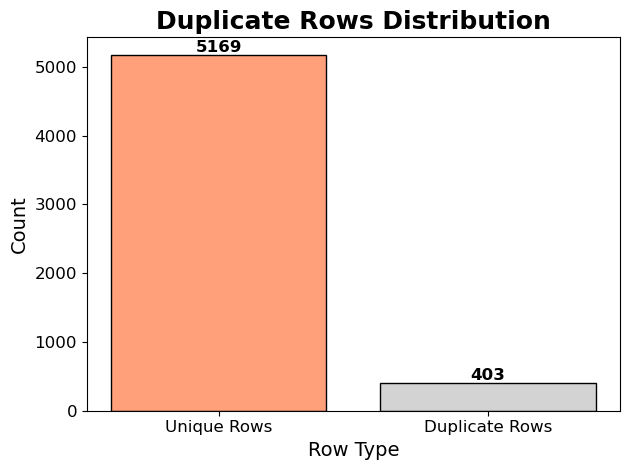

In [108]:
# This counts how many duplicate rows exist in the dataset.
duplicate_count = data.duplicated().sum()
print(f'The number of duplicates in the dataset: {duplicate_count}')

# Get the count of unique rows by subtracting the length of the entire dataset from the number of duplicates.
unique_count = len(data) - duplicate_count

row_types = ['Unique Rows', 'Duplicate Rows']
counts = [unique_count, duplicate_count]

# Use a bar chart to display how many unique_count and duplicate_count there are.
plt.bar(
    row_types,  # Labels
    counts,  # Heights of the bars
    color=["#FFA07A", "#D3D3D3"],  # Colors for the bars
    edgecolor='black'
)

# Add labels and title
plt.title('Duplicate Rows Distribution', fontsize=18, color='#000000', fontweight='bold')
plt.ylabel('Count', fontsize=14)
plt.xlabel('Row Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add counts on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12, fontweight='bold', color='black')

# Show plot
plt.tight_layout()
plt.show()

In [110]:
# Getting rid of duplicates
data=data.drop_duplicates()

In [112]:
# Checking if there are any duplicates left.
data.duplicated().sum()

0

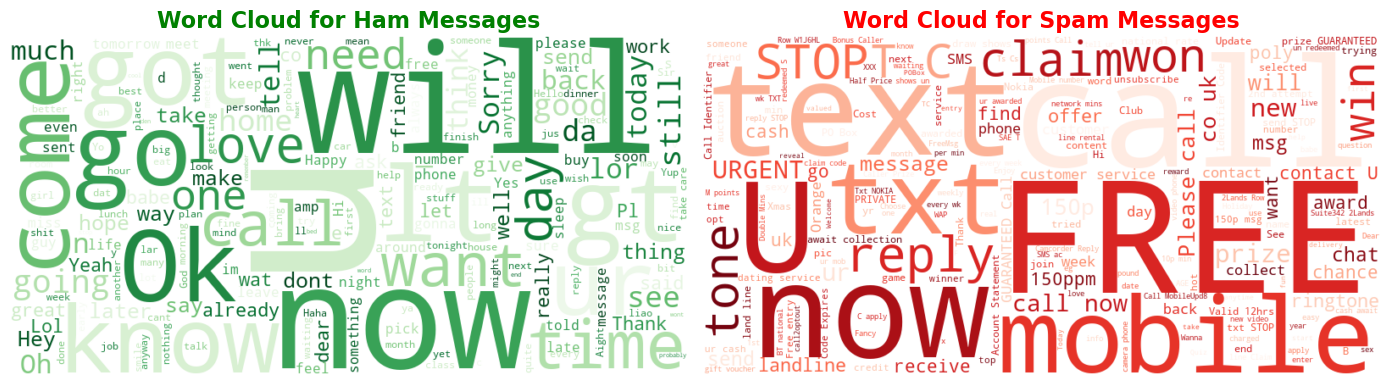

In [114]:
# To display the most used words, we can WordCloud 
# Word Cloud for Ham
ham_words = ' '.join(data[data['Label'] == 'ham']['Message'])
ham_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(ham_words)

# Word Cloud for Spam
spam_words = ' '.join(data[data['Label'] == 'spam']['Message'])
spam_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(spam_words)

# Plotting with Matplotlib
plt.figure(figsize=(14, 7))

# Ham Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages', fontsize=16, color='green', fontweight='bold')
plt.axis('off')

# Spam Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages', fontsize=16, color='red', fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

In [115]:
# Adding the following columns:
# Adding a Word Count Feature that helps to count the number of words in each message;
data['Word_Count'] = data['Message'].apply(lambda x: len(str(x).split()))

# Adding a Character Count Feature that helps to count the number of characters in each message;
data['Char_Count'] = data['Message'].apply(lambda x: len(str(x)))

# Adding Average Word Length Feature with lambda
# Handling division by zero to avoid errors for messages with zero words.
data['Avg_Word_Length'] = data.apply(
    lambda row: row['Char_Count'] / row['Word_Count'] if row['Word_Count'] > 0 else 0, axis=1
)


In [116]:
data.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


In [117]:
# Scalling features is important to make them even so that the ML Model can make accurate predictions.
scaler = MinMaxScaler()
data[['Word_Count', 'Char_Count', 'Avg_Word_Length']] = scaler.fit_transform(data[['Word_Count', 'Char_Count', 'Avg_Word_Length']])

In [118]:
data.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length
0,ham,"Go until jurong point, crazy.. Available only ...",0.111765,0.120044,0.075532
1,ham,Ok lar... Joking wif u oni...,0.029412,0.029736,0.060284
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.158824,0.168502,0.075228
3,ham,U dun say so early hor... U c already then say...,0.058824,0.051762,0.052224
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.070588,0.064978,0.057283


In [119]:
# Custom abbreviations. 
abbreviations = {
    "u": "you",
    "ur": "your",
    "wat": "what",
    "n": "and",
    "e": "the",
    "lol": "laughing out loud",
    "brb": "be right back",
    "gtg": "got to go",
    "idk": "I don't know",
    "omg": "oh my god",
    "ttyl": "talk to you later",
    "bbl": "be back later",
    "lmk": "let me know",
    "smh": "shaking my head",
    "tbh": "to be honest",
    "rofl": "rolling on the floor laughing",
    "afk": "away from keyboard",
    "np": "no problem",
    "ty": "thank you",
    "yw": "you're welcome",
    "hbu": "how about you",
    "dnd": "do not disturb",
    "fyi": "for your information",
    "br": "best regards",
    "imo": "in my opinion",
    "btw": "by the way",
    "stfu": "shut the f*** up",
    "bff": "best friend forever",
    "xoxo": "hugs and kisses",
    "dw": "don't worry",
    "plz": "please",
    "hmu": "hit me up",
    "cya": "see you",
    "srsly": "seriously",
    "4u": "for you",
    "gr8": "great",
    "b4": "before",
    "2moro": "tomorrow",
    "xD": "laughing expression",
    "wyd": "what are you doing",
    "wtb": "want to buy",
    "wts": "want to sell",
    "wtt": "want to trade",
    "ppl": "people",
    "omw": "on my way",
    "mfw": "my face when",
    "h8": "hate",
    "asap": "as soon as possible",
    "nm": "never mind",
    "noob": "newbie",
    "gratz": "congratulations",
    "faq": "frequently asked questions",
    "np": "no problem",
    "kthxbye": "okay, thanks, bye",
}

In [120]:
# Initialize Stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to handle text normalization with stemming, stopwords, and abbreviation handling.
def normalize_text(text):
    
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = word_tokenize(text)

    # Detects abbreviations and expand them to their full form
    words = [abbreviations.get(word, word) for word in words]

    # Remove punctuation, stopwords, and non-alphabetic words
    words = [re.sub(r"[^\w\s]", "", word) for word in words if word.isalpha() and word not in stop_words]

    # Adding stem words
    words = [stemmer.stem(word) for word in words]

    # Join words back into a single string
    normalized_text = " ".join(words)
    return normalized_text

In [121]:
# Apply the normalize_text function to the 'Message' column
data['Normalized_Message'] = data['Message'].apply(normalize_text)

In [122]:
data.head()

,Label,Message,Word_Count,Char_Count,Avg_Word_Length,Normalized_Message
0,ham,"Go until jurong point, crazy.. Available only ...",0.111765,0.120044,0.075532,go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,0.029412,0.029736,0.060284,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.158824,0.168502,0.075228,free entri wkli comp win fa cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,0.058824,0.051762,0.052224,dun say earli hor c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.070588,0.064978,0.057283,nah think goe usf live around though


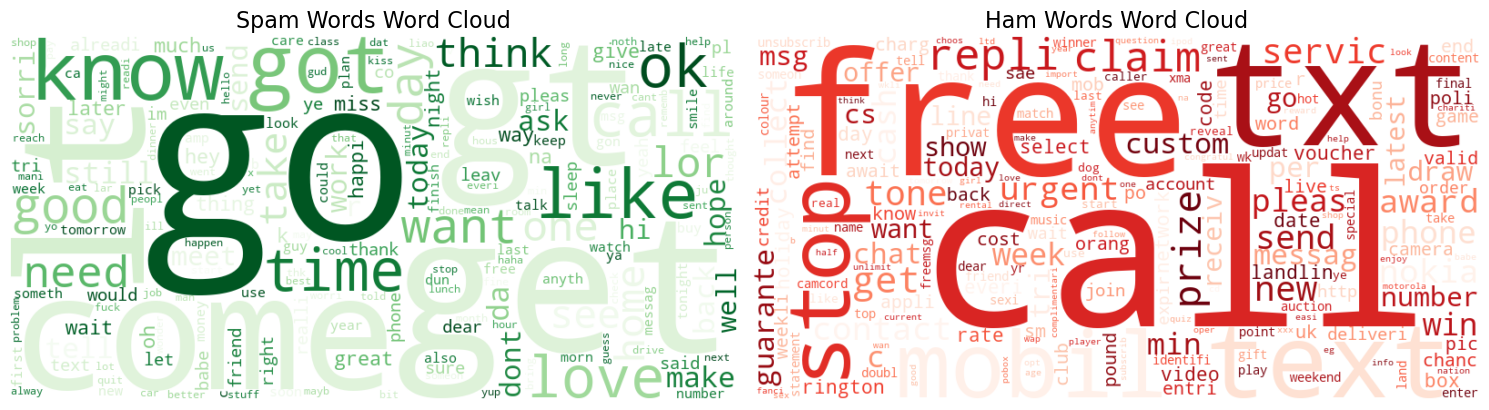

In [132]:
# Let's check with WordCloud what the most common words are in the Normalized_Message column.
spam_words = Counter(" ".join(data[data['Label'] == 'spam']['Normalized_Message']).split())
ham_words = Counter(" ".join(data[data['Label'] == 'ham']['Normalized_Message']).split())

# Generate the word cloud for spam words
spam_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(spam_words)

# Generate the word cloud for ham words
ham_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(ham_words)

# Plotting the word clouds side-by-side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Display the spam word cloud
axes[0].imshow(ham_wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("Spam Words Word Cloud", fontsize=16)

# Display the ham word cloud
axes[1].imshow(spam_wc, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("Ham Words Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()

In [133]:
#Encode Labels
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})

In [134]:
# Store features and labels in variables
X = data['Normalized_Message']
y = data['Label']

# Spliting data into training and testing datasets. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set class distribution:")
print(pd.Series(y_train).value_counts())

Training set class distribution:
Label
0    3627
1     508
Name: count, dtype: int64


In [135]:
#Vectorize Train and Test Splits Seperately

print("Before SMOTE:", y_train.value_counts())

# Convert Message data into numerical form using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Apply SMOTE to balance the number of rows in the dataset only for the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Now we have an equal amount of spam and ham, to avoid model bias
print("After SMOTE:", pd.Series(y_train).value_counts())

Before SMOTE: Label
0    3627
1     508
Name: count, dtype: int64
After SMOTE: Label
0    3627
1    3627
Name: count, dtype: int64


In [136]:
#Time to train a model. We will use 3 different ML models.
#Logistic Regression Model
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression()

In [142]:
#Support Vector Machine Model with the rbf kernel
svm_model = svm.SVC(probability=True, kernel='rbf', C=0.1, class_weight='balanced')
svm_model.fit(X_train, y_train)

SVC(C=0.1, class_weight='balanced', probability=True)

In [144]:
#And a multinomial NaiveBayes Model
mnnb = MultinomialNB()
mnnb.fit(X_train, y_train)

MultinomialNB()

In [146]:
#Lets make some predictions for all the models
y_pred_mnnb = mnnb.predict(X_test)
y_pred_logr = logr.predict(X_test)
y_pred_svm_model = svm_model.predict(X_test)

In [148]:
print("Classification Report MNNB:\n", classification_report(y_test, y_pred_mnnb))
print("Classification Report logr:\n", classification_report(y_test, y_pred_logr))
print("Classification Report SVM:\n", classification_report(y_test, y_pred_svm_model))


Classification Report MNNB:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       889
           1       0.76      0.93      0.84       145

    accuracy                           0.95      1034
   macro avg       0.87      0.94      0.90      1034
weighted avg       0.96      0.95      0.95      1034

Classification Report logr:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       889
           1       0.86      0.94      0.89       145

    accuracy                           0.97      1034
   macro avg       0.92      0.96      0.94      1034
weighted avg       0.97      0.97      0.97      1034

Classification Report SVM:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       889
           1       0.86      0.74      0.80       145

    accuracy                           0.95      1034
   macro avg       0.91      0.86      0.8

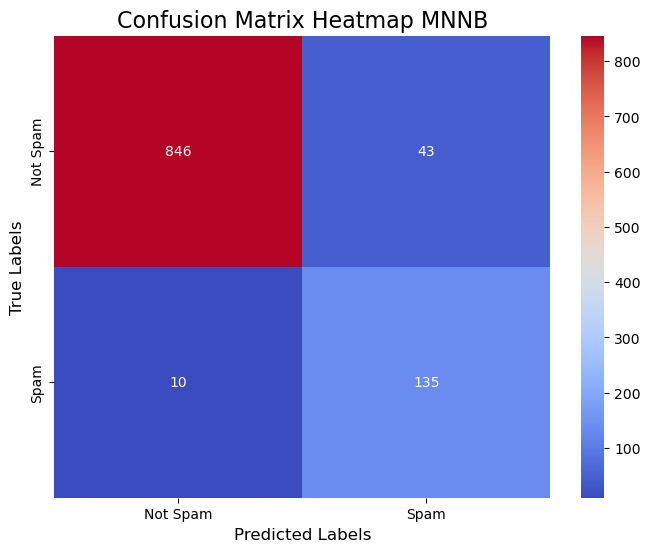

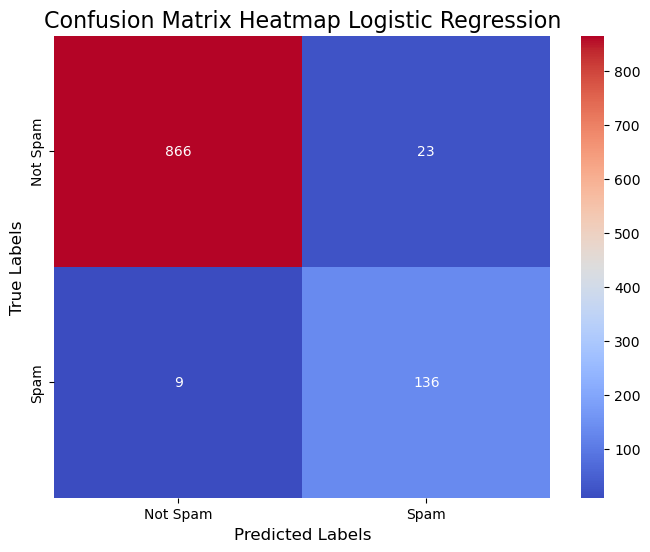

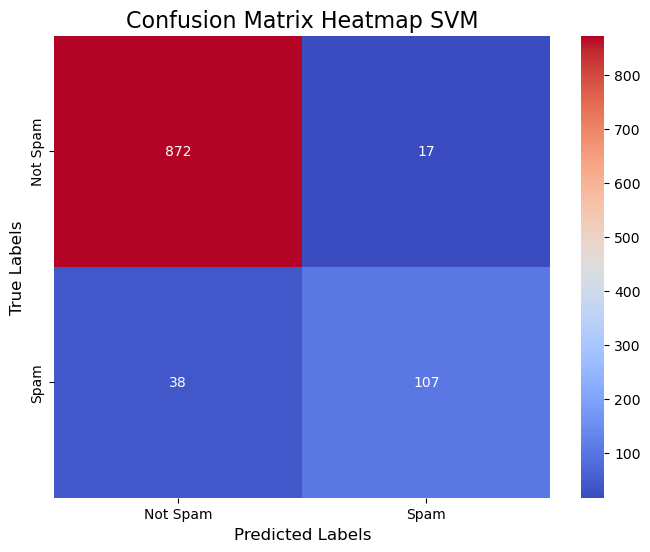

In [150]:
#Lets Plot some Heatmaps for some nice visuals
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix_mnnb = confusion_matrix(y_test, y_pred_mnnb)
conf_matrix_logr = confusion_matrix(y_test, y_pred_logr)
conf_matrix_svm_model = confusion_matrix(y_test, y_pred_svm_model)


# Plot the confusion matrix as a heatmap for MNNB
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mnnb, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"], cbar=True)

# Add titles and labels
plt.title('Confusion Matrix Heatmap MNNB', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Show the plot
plt.show()


# Plot the confusion matrix as a heatmap for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logr, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"], cbar=True)

# Step 4: Add titles and labels
plt.title('Confusion Matrix Heatmap Logistic Regression', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Show the plot
plt.show()

# Plot the confusion matrix as a heatmap for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm_model, annot=True, fmt='d', cmap='coolwarm', xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"], cbar=True)

# Step 4: Add titles and labels
plt.title('Confusion Matrix Heatmap SVM', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)

# Show the plot
plt.show()

Lets Test it with some self created messages

In [153]:
#The predict message function will take in the message and run it through the same pipeline as out test split dataset
#So normalizing and vectorizing the message and give out some probabilites of ham or spam
def predict_message(message, model, vectorizer):
    # Define label mapping
    label_mapping = {
        0: "Not Spam", 
        1: "Spam"       
    }
    
    # Preprocess the message
    normalized_message = normalize_text(message)
    message_transformed = vectorizer.transform([normalized_message])
    
    # Predict the class and probabilities
    predicted_probabilities = model.predict_proba(message_transformed)[0]
    predicted_class = int(predicted_probabilities[1] > 0.5)

    # Map the predicted class to its label
    predicted_label = label_mapping[predicted_class]
    
    return predicted_label, predicted_probabilities

In [155]:
first_message = "We’re thrilled to inform you that you’ve been chosen to receive a FREE 7-Day Luxury Vacation to a destination of your choice! 🌟 This exclusive offer is available for a limited time only, so act fast to claim your prize."
second_message = "Subject: Reminder: Team Meeting Tomorrow at 10:00 AM in the main conference room—agenda includes project updates, upcoming deadlines, and open discussion; let me know if you’d like to add anything."
predicted_class, predicted_probabilities = predict_message(first_message, mnnb, vectorizer)
predicted_second_class, predicted_second_probabilities = predict_message(second_message, mnnb, vectorizer)

print("Test for MNNB")
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")

print(f"Predicted Class: {predicted_second_class}")
print(f"Prediction Probabilities: {predicted_second_probabilities}")

Test for MNNB
Predicted Class: Spam
Prediction Probabilities: [0.02388097 0.97611903]
Predicted Class: Not Spam
Prediction Probabilities: [0.93754509 0.06245491]


In [157]:
first_message = "We’re thrilled to inform you that you’ve been chosen to receive a FREE 7-Day Luxury Vacation to a destination of your choice! 🌟 This exclusive offer is available for a limited time only, so act fast to claim your prize."
second_message = "Subject: Reminder: Team Meeting Tomorrow at 10:00 AM in the main conference room—agenda includes project updates, upcoming deadlines, and open discussion; let me know if you’d like to add anything."
predicted_class, predicted_probabilities = predict_message(first_message, logr, vectorizer)
predicted_second_class, predicted_second_probabilities = predict_message(second_message, logr, vectorizer)

print("Test for Logistic Regression")
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")

print(f"Predicted Class: {predicted_second_class}")
print(f"Prediction Probabilities: {predicted_second_probabilities}")

Test for Logistic Regression
Predicted Class: Spam
Prediction Probabilities: [0.1214701 0.8785299]
Predicted Class: Not Spam
Prediction Probabilities: [0.92427034 0.07572966]


In [159]:
first_message = "We’re thrilled to inform you that you’ve been chosen to receive a FREE 7-Day Luxury Vacation to a destination of your choice! 🌟 This exclusive offer is available for a limited time only, so act fast to claim your prize."
second_message = "Subject: Reminder: Team Meeting Tomorrow at 10:00 AM in the main conference room—agenda includes project updates, upcoming deadlines, and open discussion; let me know if you’d like to add anything."
predicted_class, predicted_probabilities = predict_message(first_message, svm_model, vectorizer)
predicted_second_class, predicted_second_probabilities = predict_message(second_message, svm_model, vectorizer)

print("Test for SVM")
print(f"Predicted Class: {predicted_class}")
print(f"Prediction Probabilities: {predicted_probabilities}")

print(f"Predicted Class: {predicted_second_class}")
print(f"Prediction Probabilities: {predicted_second_probabilities}")

Test for SVM
Predicted Class: Spam
Prediction Probabilities: [0.28359674 0.71640326]
Predicted Class: Not Spam
Prediction Probabilities: [0.98565864 0.01434136]


Experimental Results:

Support Vector Machines:

- Accuracy: 94%
- F1-Score: 95%
- 
Great Scores, but often overconfident in predictions. Even when they are wrong.

Naive Bayes:

- Accuracy: 96%
- F1-Score: 95%

Logistic Regression:

- Accuracy: 97%
- F1-Score: 97%

# Explainable AI Tests with Lime

MNNB

In [164]:
#wrapper function to execute the Lime explainer correctly
def predict_proba_mnnb(messages):
    probabilities = [predict_message(message, mnnb, vectorizer)[1] for message in messages]
    return np.array(probabilities)

In [166]:
#Initialize Explainer with class names
explainer = LimeTextExplainer(class_names=['Not Spam', 'Spam'])

#Explain a Prediction
new_message="Congratulations! you have won 1 Million dollars from our trust fund. Invest now in Crypto to get your rewards"
explanation = explainer.explain_instance(new_message, predict_proba_mnnb, num_features=10)
explanation.show_in_notebook()

SVM

In [ ]:
#wrapper function to execute the Lime explainer correctly

def predict_proba_svm(messages):
    probabilities = [predict_message(message, svm_model, vectorizer)[1] for message in messages]
    return np.array(probabilities)

In [ ]:
#Explain a Prediction
new_message="Great News! Call FREEFONE 08006344447 to claim your guaranteed å£1000 CASH or å£2000 gift. Speak to a live operator NOW!"
explanation = explainer.explain_instance(new_message, predict_proba_svm, num_features=10)
explanation.show_in_notebook()

In [ ]:
#Explain a Prediction
new_message="Congratulations! you have won 1 Million dollars from our trust fund. Invest now in Crypto to get your rewards"
explanation = explainer.explain_instance(new_message, predict_proba_svm, num_features=10)
explanation.show_in_notebook()

In [ ]:
#Explain a Prediction
new_message="Congratulations! you have won 1 Million dollars from our trust fund. Invest now in Crypto to get your rewards, CALL FREE"
explanation = explainer.explain_instance(new_message, predict_proba_svm, num_features=10)
explanation.show_in_notebook()

Logistic Regression

In [ ]:
def predict_proba_logr(messages):
    probabilities = [predict_message(message, logr, vectorizer)[1] for message in messages]
    return np.array(probabilities)

In [ ]:
#Explain a Prediction
new_message="Great News! Call FREEFONE 08006344447 to claim your guaranteed å£1000 CASH or å£2000 gift. Speak to a live operator NOW!"
explanation = explainer.explain_instance(new_message, predict_proba_logr, num_features=10)
explanation.show_in_notebook()


Lime Results:

Since all models are very accurate when testing with the test split data, you can notice some correlations when interpreting the models with Lime.
When testing with the above spam message, all models weighted the words "call", "claim" and "cash" as most significant for SPAM. 

In generell the Explanations with Lime worked well, but the svm Model was cryptic at times. It is very overconfident, always giving near perfect probabilites which can lead to totally wrong predictions at times.

We also noticed when creating messages ourselves some for us obvious spam messages wouldn't be classified as such (""Congratulations! you have won 1 Million dollars from our trust fund. Invest now in Crypto to get your rewards"). Otherwise Lime gives great insights on how the models make decission and weigh parameters.

# SHAP values for Logistic Regression Model

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


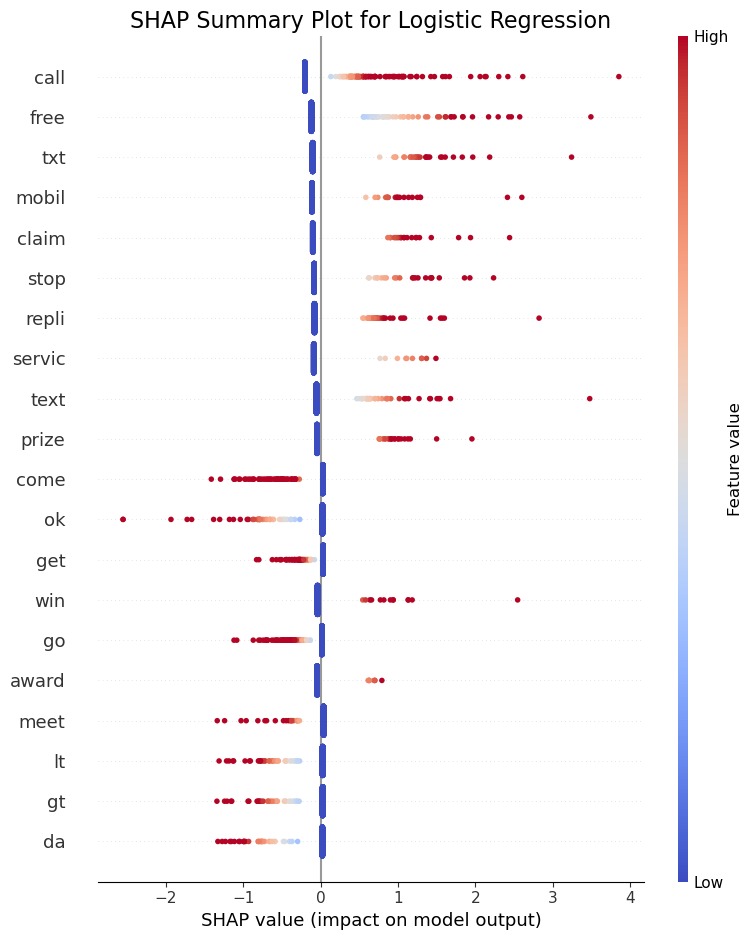

In [168]:
# Extract feature names from vectorizer
feature_names = vectorizer.get_feature_names_out()
X_test_dense = X_test.toarray()

# Initialize explainer for logistic Regression
logr_explainer = shap.LinearExplainer(logr, X_train)

# Compute SHAP values for a sample dataset
logr_shap_values = logr_explainer(X_test_dense)

# Customize the SHAP summary plot
plt.figure(figsize=(12, 8))
plt.title('SHAP Summary Plot for Logistic Regression', fontsize=16)

# Plot the SHAP summary with corrected inputs
shap.summary_plot(logr_shap_values, X_test_dense, feature_names=feature_names, cmap='coolwarm', plot_type="dot", max_display=20)

# Display the plot
plt.show()


SHAP Notes:

We tried to implement SHAP for the other models in a lot of different variations, but it did not work out. Either there was a mismatch in the data shape we could not fix, or the runtime simply crashed because it ran out of ram. 

Even using only small data samples was not sufficient for the other models. 

Still the plot for Logistic Regression is quite interesting, indicating that "call" is the most weighted word for the model. "call", "free" and "txt" seem to be associated with a high probability of SPAM messages.

Difficult to interpret are the high density of points around the 0 point, vertical blue lines. In Theory though these should be instances or messages which do not include these words. So it also makes sense that for example for "call", in these instances the model associate the absence of the word with a slight negative weight - so not spam.


# Conclusion and Discussion

Our experiments demonstrate that SVM, Logistic Regression and Naive Bayes combined with preprocessing techniques like TF-IDF and SMOTE, is highly effective for spam detection tasks. While we are not quite sure we did not introduce any data Leaks into the model, or overfitted it when preprocessing, the results speak for themselves.

Challenges encountered include:

- Ensuring the preprocessing pipeline did not introduce bias to the model - Assumed Overprocessing/Overfitting, because of accuracy scores
- Complexity of text normalization, to meet the models need
- Problems with implementing SHAP for all models


While we did not tune hyperparameters for the models in detail, our focus on the data preprocessing seems to be the key factor in achieving high accuracy and general good performance for this dataset.